# **Looking for plagiarism in 2,370 documents**

### ***By Rodrigo Guarneros Gutiérrez***

<span style="color:DarkGreen; font-size: 30px;">Introducción</span>

Detectar,  a nivel básico por medio de una medida de similitud, el plagio que hay dentro de un conjunto de documentos.

Para tal efecto, este documento tiene las siguientes secciones:

1. Resumen ejecutivo
2. Obtención de información
3. Normalización de cada documento por lista (folder)
    * Mayúsculas
    * Símbolos
    * Tokenización
    * Stop Words
    * Stemming (derivación)
4. Jaccard para todos los archivos
5. Eligiendo una muestra aleatoria de 20 textos sospechosos y comparando con todas las fuentes
6. Cálculo de la similaridad de Dice para la muestra aleatoria
7. Archivos a los que corresponde la similaridad de Dice y Jaccard en la muestra
8. Los resultados en una sola tabla
9. Comparación Gráfica
10. Conclusiones

<span style="color:DarkGreen; font-size: 30px;">Desarrollo</span>

In [1]:
# Dependencias: 
import io
import os
import pandas as pd
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import unicodedata
import math
import seaborn as sns
import numpy as np
import nltk
import string
import pickle
from scipy.stats import rankdata
nltk.download('stopwords')
from nltk.corpus import stopwords
import random

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1. Resumen ejecutivo

Después de idear la mejor forma de cargar todos los documentos disponibles en las carpetas de sospechosos y fuentes a manera de listas sobre las que se puedan realizar operaciones de iteración, se procedió al preprocesamiento de los datos, incluyendo los siguientes pasos:

    * Mayúsculas
    * Símbolos
    * Tokenización
    * Stop Words
    * Stemming (derivación)

Con cada archivo pre-procesado, se elaboraron las funciones correspondientes a la implementación de la similaridad de Jaccard sin peso, conforme a la literatura revisada: 

$$Jaccard(doc_1, doc_2) = \frac{|doc_1 \cap doc_2|}{|doc_1 \cup doc_2|}$$

Para este caso en particular se aplicó para todo el conjunto de documentos sospechosos (***2,370 textos***) y todo el conjunto de los documentos fuente (***237 textos***). Como resultado de lo anterior, se obtuvo que en el top 20 de los documentos con mayor score de plagio, el rango de este cosciente es de 0.24 a 0.21, tomando en cuenta todos los documentos disponibles.

En cuanto a la muestra aleatoria de 20 textos en el folder de sospechosos, se implementó una función también para el cálculo de la similaridad de Dice, en los siguientes términos:

$$Dice(doc_1, doc_2) = \frac{2 |doc_1 \cap doc_2|}{|doc_1| + |doc_2|}$$

El resultado de aplicar ambas funciones a la misma muestra aleatoria, confirma los siguientes resultados. Donde se puede ver que el mayor valor de la Similaridad de Dice es el doble de la Similaridad de Jaccard, no obstante con la misma estructura de similaridad entre los mismos textos, sin confirmar una similaridad absoluta con valor de 1:


|    | Textos_Seleccionados_Aleatoriamente   |   Similaridad_de_Dice |   Similaridad de Jaccard |
|---:|:--------------------------------------|----------------------:|-------------------------:|
| 15 | suspicious-document1382.txt           |                  0.21 |                     0.11 |
|  7 | suspicious-document1553.txt           |                  0.2  |                     0.11 |
|  0 | suspicious-document0215.txt           |                  0.19 |                     0.11 |
| 18 | suspicious-document1005.txt           |                  0.19 |                     0.11 |
| 13 | suspicious-document0654.txt           |                  0.16 |                     0.09 |
|  8 | suspicious-document2197.txt           |                  0.16 |                     0.08 |
| 19 | suspicious-document0671.txt           |                  0.16 |                     0.09 |
|  3 | suspicious-document1669.txt           |                  0.16 |                     0.08 |
|  5 | suspicious-document0442.txt           |                  0.15 |                     0.08 |
| 12 | suspicious-document0213.txt           |                  0.15 |                     0.08 |
| 10 | suspicious-document1361.txt           |                  0.15 |                     0.08 |
| 14 | suspicious-document0554.txt           |                  0.14 |                     0.07 |
| 17 | suspicious-document1368.txt           |                  0.13 |                     0.07 |
|  2 | suspicious-document0358.txt           |                  0.13 |                     0.07 |
| 11 | suspicious-document1396.txt           |                  0.11 |                     0.06 |
|  4 | suspicious-document1092.txt           |                  0.11 |                     0.06 |
|  6 | suspicious-document0157.txt           |                  0.1  |                     0.05 |
|  1 | suspicious-document1097.txt           |                  0.07 |                     0.04 |
|  9 | suspicious-document2304.txt           |                  0.06 |                     0.03 |
| 16 | suspicious-document2298.txt           |                  0.06 |                     0.03 |

La comparación gráfica nos permite confirmar lo anterior y tomar en cuenta que:

1. Como se establece en Manning & Shütze (1999), página 299, la métrica de Jaccard penaliza casi al doble del criterio de Dice a aquellos documentos que comparten una proporción muy pequeña de sus elementos (como una propoción de todos los elementos no-cero). Ambos miden en el rango de 0 (no hay traslape entre los elementos) y 1 (existe traslape perfecto entre todos los elementos). Pero el coeficiente de Jaccard proporciona bajos valores para los casos donde el traslape es bajo. El ejemplo del autor es muy claro: dos listas con 10 elementos "no cero" y sólo una entrada en común proporciona los siguientes valores: Dice = 2x1/(10+10)=0.1 y Jaccard = 1/(10+10-1)=0.5.

2. En el caso de nuestros scores, se puede ver que el máximo valor es dado al documento denominado "suspicious-document1382.txt" con un un score de Dice de 0.21 y una similaridad de Jaccard de 0.11 (21% de ese texto es considerado como común a las fuentes originales). Como se puede ver en la gráfica, los niveles de Dice son regularmente el doble de los reportados con la metodología de Jaccard, sin perder de vista una estructura similar pero con más penalización de similaridad en Jaccard.

<p align="center">
  <img src="Comparativo.png">
</p>

# 2. Obteniendo la información

In [2]:
# Textos sospechosos de plagio

folder_path_sospechosos = "./suspicious-documents/"
sospechosos = []

# Iteramos sobre los elementos que están contenidos en el folder de sospechosos
for archivo in os.listdir(folder_path_sospechosos):
    if archivo.endswith(".txt"):
        # Se construye el path completo de cada archivo con extensión txt
        file_path = os.path.join(folder_path_sospechosos, archivo)
        with open(file_path, "r", encoding="UTF-8") as f:
            contenidos = f.read()
            sospechosos.append(contenidos)

print('Leyendo todos los textos...')
print(f'Se trata de {len(sospechosos)} textos sospechosos de plagio')            
print('Un ejemplo del primer elemento de la lista de sospechosos:')
print(sospechosos[0][:600])  # imprime como ejemplo una fracción del texto inicial.



Leyendo todos los textos...
Se trata de 2370 textos sospechosos de plagio
Un ejemplo del primer elemento de la lista de sospechosos:
 WASHINGTON  ( AP )--  Robert Rubin  spent much of his life speculating what the stock market would do. He was good at it and made  $ 100 million . When he came to  Washington ,  Rubin  did essentially the same thing, speculating that if President  Clinton  would balance the budget, he would be rewarded with a booming economy. To the surprise of many, that argument caught  Clinton 's ear. And in the six years since, first as a top economic adviser and since  1995  as the  Treasury  secretary,  Rubin  has gained much credit-- in a close partnership with  Federal Reserve  Chairman  Alan Greenspa


In [3]:
# Textos originales o fuente

folder_path_fuentes = "./source-documents/"
fuentes = []

# Iteramos sobre los elementos que están contenidos en el folder de fuentes
for archivo in os.listdir(folder_path_fuentes):
    if archivo.endswith(".txt"):
        # Se construye el path completo de cada archivo con extensión txt
        file_path = os.path.join(folder_path_fuentes, archivo)
        with open(file_path, "r", encoding="UTF-8") as f:
            contenidos = f.read()
            fuentes.append(contenidos)

print('Leyendo todos los textos...')
print(f'Se trata de {len(fuentes)} textos fuente')            
print('Un ejemplo del primer elemento de la lista de textos fuente:')
print(fuentes[0][:600])  # imprime como ejemplo una fracción del texto inicial.


Leyendo todos los textos...
Se trata de 237 textos fuente
Un ejemplo del primer elemento de la lista de textos fuente:
While the commission stopped short of blaming Chief Gates for these problems, it said that no chief should serve more than two consecutive five-year terms, and that Mr. Gates, having served 13 years, should therefore turn in his badge following a transition period. But the chief, who has remained steadfast through repeated calls from community leaders for his ouster, said later: "I don't expect to just run away" from the job. Nearly one-quarter of 650 officers responding to a commission survey agreed that "racial bias on the part of officers toward minority citizens currently exists and contri


# 3. Normalización

# 3.1 Mayúsculas en cada lista

In [4]:
# cada elemento en minúscula
fuentes_minusculas = [fuentes[i].lower() for i in range(len(fuentes))]
fuentes_minusculas[0][:600]

'while the commission stopped short of blaming chief gates for these problems, it said that no chief should serve more than two consecutive five-year terms, and that mr. gates, having served 13 years, should therefore turn in his badge following a transition period. but the chief, who has remained steadfast through repeated calls from community leaders for his ouster, said later: "i don\'t expect to just run away" from the job. nearly one-quarter of 650 officers responding to a commission survey agreed that "racial bias on the part of officers toward minority citizens currently exists and contri'

In [5]:
# cada elemento en minúscula
sospechosos_minusculas = [sospechosos[i].lower() for i in range(len(sospechosos))]
sospechosos_minusculas[0][:600]

" washington  ( ap )--  robert rubin  spent much of his life speculating what the stock market would do. he was good at it and made  $ 100 million . when he came to  washington ,  rubin  did essentially the same thing, speculating that if president  clinton  would balance the budget, he would be rewarded with a booming economy. to the surprise of many, that argument caught  clinton 's ear. and in the six years since, first as a top economic adviser and since  1995  as the  treasury  secretary,  rubin  has gained much credit-- in a close partnership with  federal reserve  chairman  alan greenspa"

# 3.2. Búsqueda de símbolos y eliminación

In [6]:
# SOSPECHOSOS
sospechosos_minusc_simbol = [sospechosos_minusculas[i].translate({ord(i): ' ' for i in ""''",' ', '\n', '`', ''', '/', '%', 'ø', '\xad', '+', 'μ', 'æ', 'ß', '_', '·', 'ð', '&', '=', '``', '`', '$', '\\', '.', '(', ')', '--', ':', '``', "''", "' '", '``'"}) for i in range (len(sospechosos_minusculas))]
sospechosos_minusc_simbol[0][0:600]

' washington    ap      robert rubin  spent much of his life speculating what the stock market would do  he was good at it and made    100 million   when he came to  washington    rubin  did essentially the same thing  speculating that if president  clinton  would balance the budget  he would be rewarded with a booming economy  to the surprise of many  that argument caught  clinton  s ear  and in the six years since  first as a top economic adviser and since  1995  as the  treasury  secretary   rubin  has gained much credit   in a close partnership with  federal reserve  chairman  alan greenspa'

In [7]:
# FUENTES
fuentes_minusc_simbol = [fuentes_minusculas[i].translate({ord(i): ' ' for i in ""''",' ', '\n', '`', ''', '/', '%', 'ø', '\xad', '+', 'μ', 'æ', 'ß', '_', '·', 'ð', '&', '=', '``', '`', '$', '\\', '.', '(', ')', '--', ':', '``', "''", "' '", '``'"}) for i in range (len(fuentes_minusculas))]
fuentes_minusc_simbol[0][0:600]

'while the commission stopped short of blaming chief gates for these problems  it said that no chief should serve more than two consecutive five year terms  and that mr  gates  having served 13 years  should therefore turn in his badge following a transition period  but the chief  who has remained steadfast through repeated calls from community leaders for his ouster  said later  "i don t expect to just run away" from the job  nearly one quarter of 650 officers responding to a commission survey agreed that "racial bias on the part of officers toward minority citizens currently exists and contri'

# 3.3 Tokenizamos cada texto de cada folder: sospechosos y fuentes

In [8]:
# sospechosos
sospechosos_tokens = []
for lista in sospechosos_minusc_simbol:
    tokenized_lista = nltk.word_tokenize(lista)
    sospechosos_tokens.append(tokenized_lista)

print(sospechosos_tokens[0][:60])


['washington', 'ap', 'robert', 'rubin', 'spent', 'much', 'of', 'his', 'life', 'speculating', 'what', 'the', 'stock', 'market', 'would', 'do', 'he', 'was', 'good', 'at', 'it', 'and', 'made', '100', 'million', 'when', 'he', 'came', 'to', 'washington', 'rubin', 'did', 'essentially', 'the', 'same', 'thing', 'speculating', 'that', 'if', 'president', 'clinton', 'would', 'balance', 'the', 'budget', 'he', 'would', 'be', 'rewarded', 'with', 'a', 'booming', 'economy', 'to', 'the', 'surprise', 'of', 'many', 'that', 'argument']


In [9]:
# fuentes
fuentes_tokens = []
for lista in fuentes_minusc_simbol:
    tokenized_lista = nltk.word_tokenize(lista)
    fuentes_tokens.append(tokenized_lista)

print(fuentes_tokens[0][:60])

['while', 'the', 'commission', 'stopped', 'short', 'of', 'blaming', 'chief', 'gates', 'for', 'these', 'problems', 'it', 'said', 'that', 'no', 'chief', 'should', 'serve', 'more', 'than', 'two', 'consecutive', 'five', 'year', 'terms', 'and', 'that', 'mr', 'gates', 'having', 'served', '13', 'years', 'should', 'therefore', 'turn', 'in', 'his', 'badge', 'following', 'a', 'transition', 'period', 'but', 'the', 'chief', 'who', 'has', 'remained', 'steadfast', 'through', 'repeated', 'calls', 'from', 'community', 'leaders', 'for', 'his', 'ouster']


# 3.4 Controlamos las ***stop words***

In [10]:
# Definiendo las stops words

from nltk.corpus import stopwords
stopwords_control = stopwords.words('english')
type(stopwords) # list

nltk.corpus.reader.wordlist.WordListCorpusReader

In [11]:
stop_words = set(stopwords.words('english'))

def remover_soptwords(documentos):
    documentos_finales = []
    for doc in documentos:
        documentos_limpios = [i for i in doc if not i in stop_words]
        documentos_finales.append(documentos_limpios)
    return documentos_finales


In [12]:
sospechosos_normalizados = remover_soptwords(sospechosos_tokens)
print(sospechosos_normalizados[0][:60])

['washington', 'ap', 'robert', 'rubin', 'spent', 'much', 'life', 'speculating', 'stock', 'market', 'would', 'good', 'made', '100', 'million', 'came', 'washington', 'rubin', 'essentially', 'thing', 'speculating', 'president', 'clinton', 'would', 'balance', 'budget', 'would', 'rewarded', 'booming', 'economy', 'surprise', 'many', 'argument', 'caught', 'clinton', 'ear', 'six', 'years', 'since', 'first', 'top', 'economic', 'adviser', 'since', '1995', 'treasury', 'secretary', 'rubin', 'gained', 'much', 'credit', 'close', 'partnership', 'federal', 'reserve', 'chairman', 'alan', 'greenspan', 'policies', 'spending']


In [13]:
fuentes_normalizados = remover_soptwords(fuentes_tokens)
print(fuentes_normalizados[0][:60])

['commission', 'stopped', 'short', 'blaming', 'chief', 'gates', 'problems', 'said', 'chief', 'serve', 'two', 'consecutive', 'five', 'year', 'terms', 'mr', 'gates', 'served', '13', 'years', 'therefore', 'turn', 'badge', 'following', 'transition', 'period', 'chief', 'remained', 'steadfast', 'repeated', 'calls', 'community', 'leaders', 'ouster', 'said', 'later', '``', 'expect', 'run', 'away', "''", 'job', 'nearly', 'one', 'quarter', '650', 'officers', 'responding', 'commission', 'survey', 'agreed', '``', 'racial', 'bias', 'part', 'officers', 'toward', 'minority', 'citizens', 'currently']


# 3.5 Se recomienda usar el ***stemmer*** de NLTK para facilidad, usar Porter (inglés) para reducir el vocabulario.

In [14]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [18]:
#stemm para sospechosos normalizado
sospechosos_normalizados_stemm = [[stemmer.stem(word) for word in texto] for texto in sospechosos_normalizados]

print(sospechosos_normalizados_stemm[0][:60])

['washington', 'ap', 'robert', 'rubin', 'spent', 'much', 'life', 'specul', 'stock', 'market', 'would', 'good', 'made', '100', 'million', 'came', 'washington', 'rubin', 'essenti', 'thing', 'specul', 'presid', 'clinton', 'would', 'balanc', 'budget', 'would', 'reward', 'boom', 'economi', 'surpris', 'mani', 'argument', 'caught', 'clinton', 'ear', 'six', 'year', 'sinc', 'first', 'top', 'econom', 'advis', 'sinc', '1995', 'treasuri', 'secretari', 'rubin', 'gain', 'much', 'credit', 'close', 'partnership', 'feder', 'reserv', 'chairman', 'alan', 'greenspan', 'polici', 'spend']


In [24]:
fuentes_normalizados_stemm = [[stemmer.stem(word) for word in texto] for texto in fuentes_normalizados]

print(fuentes_normalizados_stemm[0][:60])

['commiss', 'stop', 'short', 'blame', 'chief', 'gate', 'problem', 'said', 'chief', 'serv', 'two', 'consecut', 'five', 'year', 'term', 'mr', 'gate', 'serv', '13', 'year', 'therefor', 'turn', 'badg', 'follow', 'transit', 'period', 'chief', 'remain', 'steadfast', 'repeat', 'call', 'commun', 'leader', 'ouster', 'said', 'later', '``', 'expect', 'run', 'away', "''", 'job', 'nearli', 'one', 'quarter', '650', 'offic', 'respond', 'commiss', 'survey', 'agre', '``', 'racial', 'bia', 'part', 'offic', 'toward', 'minor', 'citizen', 'current']


In [26]:
print(fuentes_normalizados_stemm[236][:60])

['studi', 'found', 'u', 'death', 'toll', 'major', 'hurrican', 'could', 'far', 'wors', 'previous', 'predict', 'head', 'nation', 'hurrican', 'center', 'said', 'tuesday', 'mark', 'open', '1988', 'atlant', 'storm', 'season', 'recent', 'complet', 'hurrican', 'coastal', 'flood', 'model', 'atlant', 'gulf', 'coast', 'show', 'mani', 'peopl', 'earlier', 'thought', 'must', 'evacu', 'certain', 'condit', 'said', 'center', 'director', 'bob', 'sheet', 'forti', 'three', 'million', 'peopl', 'live', '175', 'coastal', 'counti', 'main', 'texa', 'evacu', 'crowd', 'urban']


# 4. Para procesar similitud se utiliza la medida de Jaccard sin peso.

$$Jaccard(doc_1, doc_2) = \frac{|doc_1 \cap doc_2|}{|doc_1 \cup doc_2|}$$

In [27]:
def similaridad_jaccard(doc1, doc2):
    set1 = set(doc1)
    set2 = set(doc2)
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union)

def compare_docs(documents1, documents2):
    similaridades = []
    for doc1 in documents1:
        for doc2 in documents2:
            similaridad = similaridad_jaccard(doc1, doc2)
            similaridades.append(similaridad)
    return similaridades

In [110]:
similaridades = compare_docs(sospechosos_normalizados_stemm, fuentes_normalizados_stemm)
top_similaridades = sorted(similaridades, reverse=True)[:20]
print(f'Las 20 similaridades de Jaccard de los documentos sospechosos respecto a cada una de las fuentes: {top_similaridades}')


Las 20 similaridades de Jaccard de los documentos sospechosos respecto a cada una de las fuentes: [0.24022346368715083, 0.23976608187134502, 0.2341069626639758, 0.23399558498896247, 0.23270440251572327, 0.22646310432569974, 0.22564102564102564, 0.22171945701357465, 0.21890547263681592, 0.2179176755447942, 0.21657754010695188, 0.21464646464646464, 0.21398305084745764, 0.21325051759834368, 0.21308016877637131, 0.21226415094339623, 0.2116564417177914, 0.2116279069767442, 0.2100456621004566, 0.2087912087912088]


# 5. Eligiendo una muestra aleatoria de 20 textos sospechosos y comparando con todas las fuentes.

In [67]:
# Muestra aleatoria de 20 documentos de la lista de listas de sospechosos_normalizados_stemm asumiendo una distribución normal

random.seed(123)
muestra_sospechosos = random.sample(sospechosos_normalizados_stemm, 20)
print(f"La muestra de sospechosos son: {muestra_sospechosos[0][:60]}")

posiciones_index = [sospechosos_normalizados_stemm.index(elem) for elem in muestra_sospechosos]

print(f"Index positions of randomly selected elements: {posiciones_index}")


La muestra de sospechosos son: ['washington', 'top', 'offici', 'clinton', 'administr', 'strongli', 'object', 'wednesday', 'republican', 'plan', 'would', 'allow', 'money', 'theoret', 'earmark', 'social', 'secur', 'spent', 'purpos', 'next', 'two', 'year', 'hear', 'hous', 'way', 'mean', 'subcommitte', 'social', 'secur', 'senior', 'democrat', 'congressman', 'worri', 'aloud', 'presid', 'clinton', 'would', 'lure', 'democrat', 'lawmak', 'take', 'difficult', 'stand', 'social', 'secur', 'occas', 'past', 'revers', 'cours', 'leav', 'legisl', 'alli', 'strand', 'polit', 'administr', 'offici', 'deputi', 'treasuri', 'secretari', 'lawrenc']
Index positions of randomly selected elements: [214, 1096, 357, 1668, 1091, 441, 156, 1552, 2196, 2303, 1360, 1395, 212, 653, 553, 1381, 2297, 1367, 1004, 670]


# 6. Sobre los mismos documentos elegidos (muestra) y usar la medida Dice sin pesado.

$$Dice(doc_1, doc_2) = \frac{2 |doc_1 \cap doc_2|}{|doc_1| + |doc_2|}$$

In [43]:
# Implementando Dice método sin peso.
def similaridad_dice(lista1, lista2):
    # Convert nested lists to tuples to remove duplicates
    lista1 = [tuple(l) for l in lista1]
    lista2 = [tuple(l) for l in lista2]
    
    # Convert the lists to sets to remove duplicates
    set1 = set(lista1)
    set2 = set(lista2)
    
    # Calculate the intersection of the sets
    intersection = set1.intersection(set2)
    
    # Calculate the Dice similarity coefficient
    similarity = (2.0 * len(intersection)) / (len(set1) + len(set2))
    
    return similarity


In [100]:
similaridades_jaccard = []
for sospechoso in muestra_sospechosos:
    sim = []
    for fuente in fuentes_normalizados_stemm:
        sim.append(compare_docs([sospechoso], [fuente]))
    similaridades_jaccard.append(sim)

top_similaridades_jaccard = list(itertools.chain(*similaridades_jaccard))[:20]
print(f'Las similaridades de jaccard para los documentos sospechosos respecto a cada una de las fuentes son: {top_similaridades_jaccard}')


Las similaridades de jaccard para los documentos sospechosos respecto a cada una de las fuentes son: [[0.10526315789473684], [0.038636363636363635], [0.07086614173228346], [0.08488964346349745], [0.05938242280285035], [0.08166969147005444], [0.0536779324055666], [0.10909090909090909], [0.0840630472854641], [0.03194103194103194], [0.0782122905027933], [0.05912596401028278], [0.07961165048543689], [0.08860759493670886], [0.07307692307692308], [0.11432926829268293], [0.029748283752860413], [0.07218683651804671], [0.10741687979539642], [0.08941176470588236]]


In [103]:
similaridades_dice = []
for sospechoso in muestra_sospechosos:
    sim = []
    for fuente in fuentes_normalizados_stemm:
        sim.append(similaridad_dice(sospechoso, fuente))
    similaridades_dice.append(sim)

top_similaridades_dice = list(itertools.chain(*similaridades_dice))[:20]
print(f'Las similaridades de Dice para los documentos sospechosos respecto a cada una de las fuentes son: {top_similaridades_dice}')


Las similaridades de Dice para los documentos sospechosos respecto a cada una de las fuentes son: [0.19047619047619047, 0.07439824945295405, 0.1323529411764706, 0.1564945226917058, 0.11210762331838565, 0.15100671140939598, 0.1018867924528302, 0.19672131147540983, 0.15508885298869143, 0.06190476190476191, 0.14507772020725387, 0.11165048543689321, 0.1474820143884892, 0.16279069767441862, 0.13620071684587814, 0.2051983584131327, 0.057777777777777775, 0.13465346534653466, 0.19399538106235567, 0.16414686825053995]


# 7. Teniendo las posiciones veamos a qué archivos corresponden.

In [73]:
directorio = "./suspicious-documents/"

archivos = [f for f in os.listdir(directorio) if os.path.isfile(os.path.join(directorio, f))]

archivos_nombres = [archivos[i] for i in posiciones_index]

archivos_nombres


['suspicious-document0215.txt',
 'suspicious-document1097.txt',
 'suspicious-document0358.txt',
 'suspicious-document1669.txt',
 'suspicious-document1092.txt',
 'suspicious-document0442.txt',
 'suspicious-document0157.txt',
 'suspicious-document1553.txt',
 'suspicious-document2197.txt',
 'suspicious-document2304.txt',
 'suspicious-document1361.txt',
 'suspicious-document1396.txt',
 'suspicious-document0213.txt',
 'suspicious-document0654.txt',
 'suspicious-document0554.txt',
 'suspicious-document1382.txt',
 'suspicious-document2298.txt',
 'suspicious-document1368.txt',
 'suspicious-document1005.txt',
 'suspicious-document0671.txt']

# 8. Los resultados en una sola tabla

In [108]:
resultados = pd.DataFrame({"Textos_Seleccionados_Aleatoriamente":archivos_nombres, "Similaridad_de_Dice":[round(i, 2) for i in top_similaridades_dice], "Similaridad de Jaccard":[[round(element[0], 2)][0] for element in top_similaridades_jaccard]}).sort_values('Similaridad_de_Dice', ascending=False)
resultados

,Textos_Seleccionados_Aleatoriamente,Similaridad_de_Dice,Similaridad de Jaccard
15,suspicious-document1382.txt,0.21,0.11
7,suspicious-document1553.txt,0.20,0.11
0,suspicious-document0215.txt,0.19,0.11
18,suspicious-document1005.txt,0.19,0.11
13,suspicious-document0654.txt,0.16,0.09
8,suspicious-document2197.txt,0.16,0.08
19,suspicious-document0671.txt,0.16,0.09
3,suspicious-document1669.txt,0.16,0.08
5,suspicious-document0442.txt,0.15,0.08
12,suspicious-document0213.txt,0.15,0.08


In [124]:
resultados_long = pd.melt(resultados, id_vars=["Textos_Seleccionados_Aleatoriamente"], 
                          value_vars=["Similaridad_de_Dice", "Similaridad de Jaccard"], 
                          var_name="Tipo_similaridad", value_name="Valor_similaridad")
resultados_long

,Textos_Seleccionados_Aleatoriamente,Tipo_similaridad,Valor_similaridad
0,suspicious-document1382.txt,Similaridad_de_Dice,0.21
1,suspicious-document1553.txt,Similaridad_de_Dice,0.20
2,suspicious-document0215.txt,Similaridad_de_Dice,0.19
3,suspicious-document1005.txt,Similaridad_de_Dice,0.19
4,suspicious-document0654.txt,Similaridad_de_Dice,0.16
5,suspicious-document2197.txt,Similaridad_de_Dice,0.16
6,suspicious-document0671.txt,Similaridad_de_Dice,0.16
7,suspicious-document1669.txt,Similaridad_de_Dice,0.16
8,suspicious-document0442.txt,Similaridad_de_Dice,0.15
9,suspicious-document0213.txt,Similaridad_de_Dice,0.15


# 9. Comparación gráfica

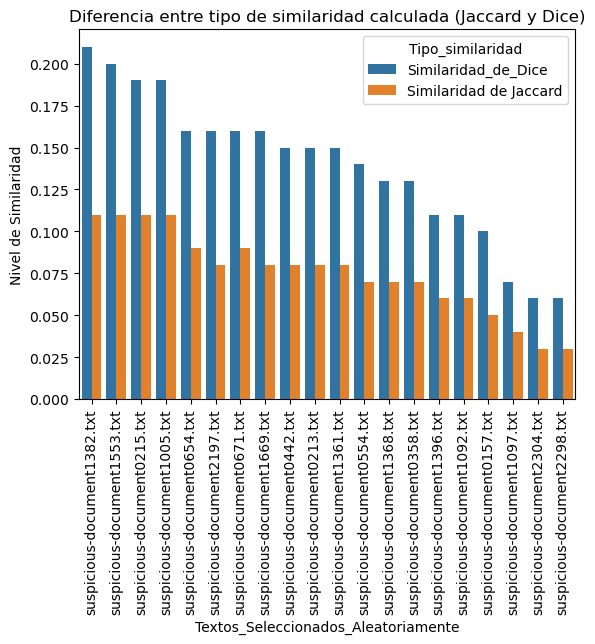

In [125]:
sns.barplot(x='Textos_Seleccionados_Aleatoriamente', y='Valor_similaridad', hue='Tipo_similaridad', data=resultados_long)
plt.xticks(rotation=90)
plt.ylabel('Nivel de Similaridad')
plt.title('Diferencia entre tipo de similaridad calculada (Jaccard y Dice)');
plt.savefig("Comparativo.png", dpi=300, bbox_inches='tight')
plt.show()

<span style="color:DarkGreen; font-size: 30px;">Conclusiones</span>

1. Como se establece en Manning & Shütze (1999), página 299, la métrica de Jaccard penaliza casi al doble del criterio de Dice a aquellos documentos que comparten una proporción muy pequeña de sus elementos (como una propoción de todos los elementos no-cero). Ambos miden en el rango de 0 (no hay traslape entre los elementos) y 1 (existe traslape perfecto entre todos los elementos). Pero el coeficiente de Jaccard proporciona bajos valores para los casos donde el traslape es bajo. El ejemplo del autor es muy claro: dos listas con 10 elementos "no cero" y sólo una entrada en común proporciona los siguientes valores: Dice = 2x1/(10+10)=0.1 y Jaccard = 1/(10+10-1)=0.5.

2. En el caso de nuestros scores, se puede ver que el máximo valor es dado al documento denominado "suspicious-document1382.txt" con un un score de Dice de 0.21 y una similaridad de Jaccard de 0.11 (21% de ese texto es considerado como común a las fuentes originales). Como se puede ver en la gráfica, los niveles de Dice son regularmente el doble de los reportados con la metodología de Jaccard, sin perder de vista una estructura similar pero con más penalización de similaridad en Jaccard.

3. Me hubiera gustado ver cómo se comporta una similaridad de coseno, pero ya no me dió tiempo. Según este artículo "A Survey of Text Similarity Approaches" de Gomathi y Suresh y disponible en: https://www.researchgate.net/publication/259181798_A_Survey_of_Text_Similarity_Approaches, esta técnica es más común para comparación de textos y las de Dice y Jaccard son más usadas comunmente para tareas de clustering y clasificación.

### Bibliografía y referencias electrónicas

- Library NLTK para entender el método sent_tokenize y el módulo PunktSentenceTokenizer. Disponible en: https://www.nltk.org/api/nltk.tokenize.html y en https://www.nltk.org/api/nltk.tokenize.punkt.html#:~:text=Punkt%20Sentence%20Tokenizer,before%20it%20can%20be%20used. 
- Euclidean Distance & Cosine Similarity | Introduction to Data Mining part 18, disponible en: https://youtu.be/Dd16LVt5ct4
- Cosine similarity, cosine distance explained | Math, Statistics for data science, machine learning, disponible en: https://youtu.be/m_CooIRM3UI

- Using List as default_factory en Geek for Geeks. Disponible en: https://www.geeksforgeeks.org/defaultdict-in-python/.
- Information entropy | Journey into information theory | Computer Science | Khan Academy: https://youtu.be/2s3aJfRr9gE
- Jurafsky, D. & Martin, J.H. (2008). Speech and Language Processing. Prentice Hall, Segunda Edición.
- Manning, C. & Schütze, H. (1999). Foundations of Statistical Natural Language Processing, MIT Press. Cambridge, MA. 
- Chen, R.,  Haitao L. & Altmann, G. (2016). Entropy in different text types. Digital Scholarship in the Humanities, vol. 32, Issue 3, pp. 528–542.
- Text Normalization for Natural Language Processing in Python. Disponible en: https://lvngd.com/blog/text-normalization-natural-language-processing-python/
